# Decorators
Decorators modify the behaviour of any function

1. input function 
2. output function -> wrapper

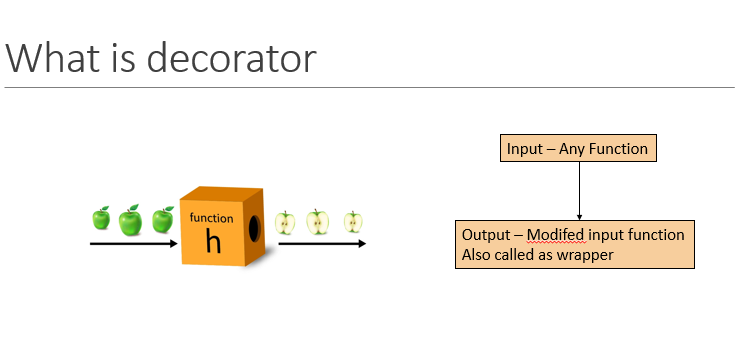

In [1]:
def welcome(func):
    def wrapper(*args, **kwargs):
        print("Welcome User")
        res = func(*args, **kwargs)
        print(f"Function Results : {res}")
        print("Thank You!")
        return res

    return wrapper

In [2]:
# Call the decorator
import math


@welcome
def hypotenuse(a: float, b: float) -> float:
    c = math.sqrt(a**2 + b**2)
    return c

In [3]:
h1 = hypotenuse(3.0, 4.0)

Welcome User
Function Results : 5.0
Thank You!


In [4]:
h1

5.0

In [5]:
h2 = hypotenuse(12.5, 13.2)

Welcome User
Function Results : 18.179383927955314
Thank You!


In [6]:
# Apply welcome decorator on simple interst function


@welcome
def simple_intrest(p: float, n: float, r: float) -> tuple[float, float]:
    i = (p * n * r) / 100
    a = p + i
    return i, a

In [7]:
i1, a1 = simple_intrest(p=50_000.0, n=5.0, r=7.5)

Welcome User
Function Results : (18750.0, 68750.0)
Thank You!


In [8]:
i1

18750.0

In [9]:
a1

68750.0

In [10]:
i2, a2 = simple_intrest(p=23_000.0, n=5.5, r=6.5)

Welcome User
Function Results : (8222.5, 31222.5)
Thank You!
